In [3]:
#Requierd Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Stroke Predciton Data Preprocessing

In [4]:
#Function used to load csv data given a path 
def load_data(data_path):
    return pd.read_csv(data_path)

In [5]:
#Loading data and generating a data frame
data_path = "../data/healthcare-dataset-stroke-data.csv"
stroke_data = load_data(data_path)
stroke_df = pd.DataFrame(stroke_data)

In [6]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
#Generating the Descriptive Statistic
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


 <font size = 3> 
Observations: <br>
  - The average age is 43 years<br>
  - The average bmi is close to 29, which is considered unhealthy<br>
  - The average glucose level is 106, which is slightly unhealthy <br> 
  - The average in both hypertension and heart disease is low, meaning the population sample have a healthy hearth<br>
  - The 25%, 50%, 75% for hypertension, heart_disease, and stroke is 0. Meaning a most of the <br>
    patients in the Data set did not have a heart disease, hypertension or a stroke

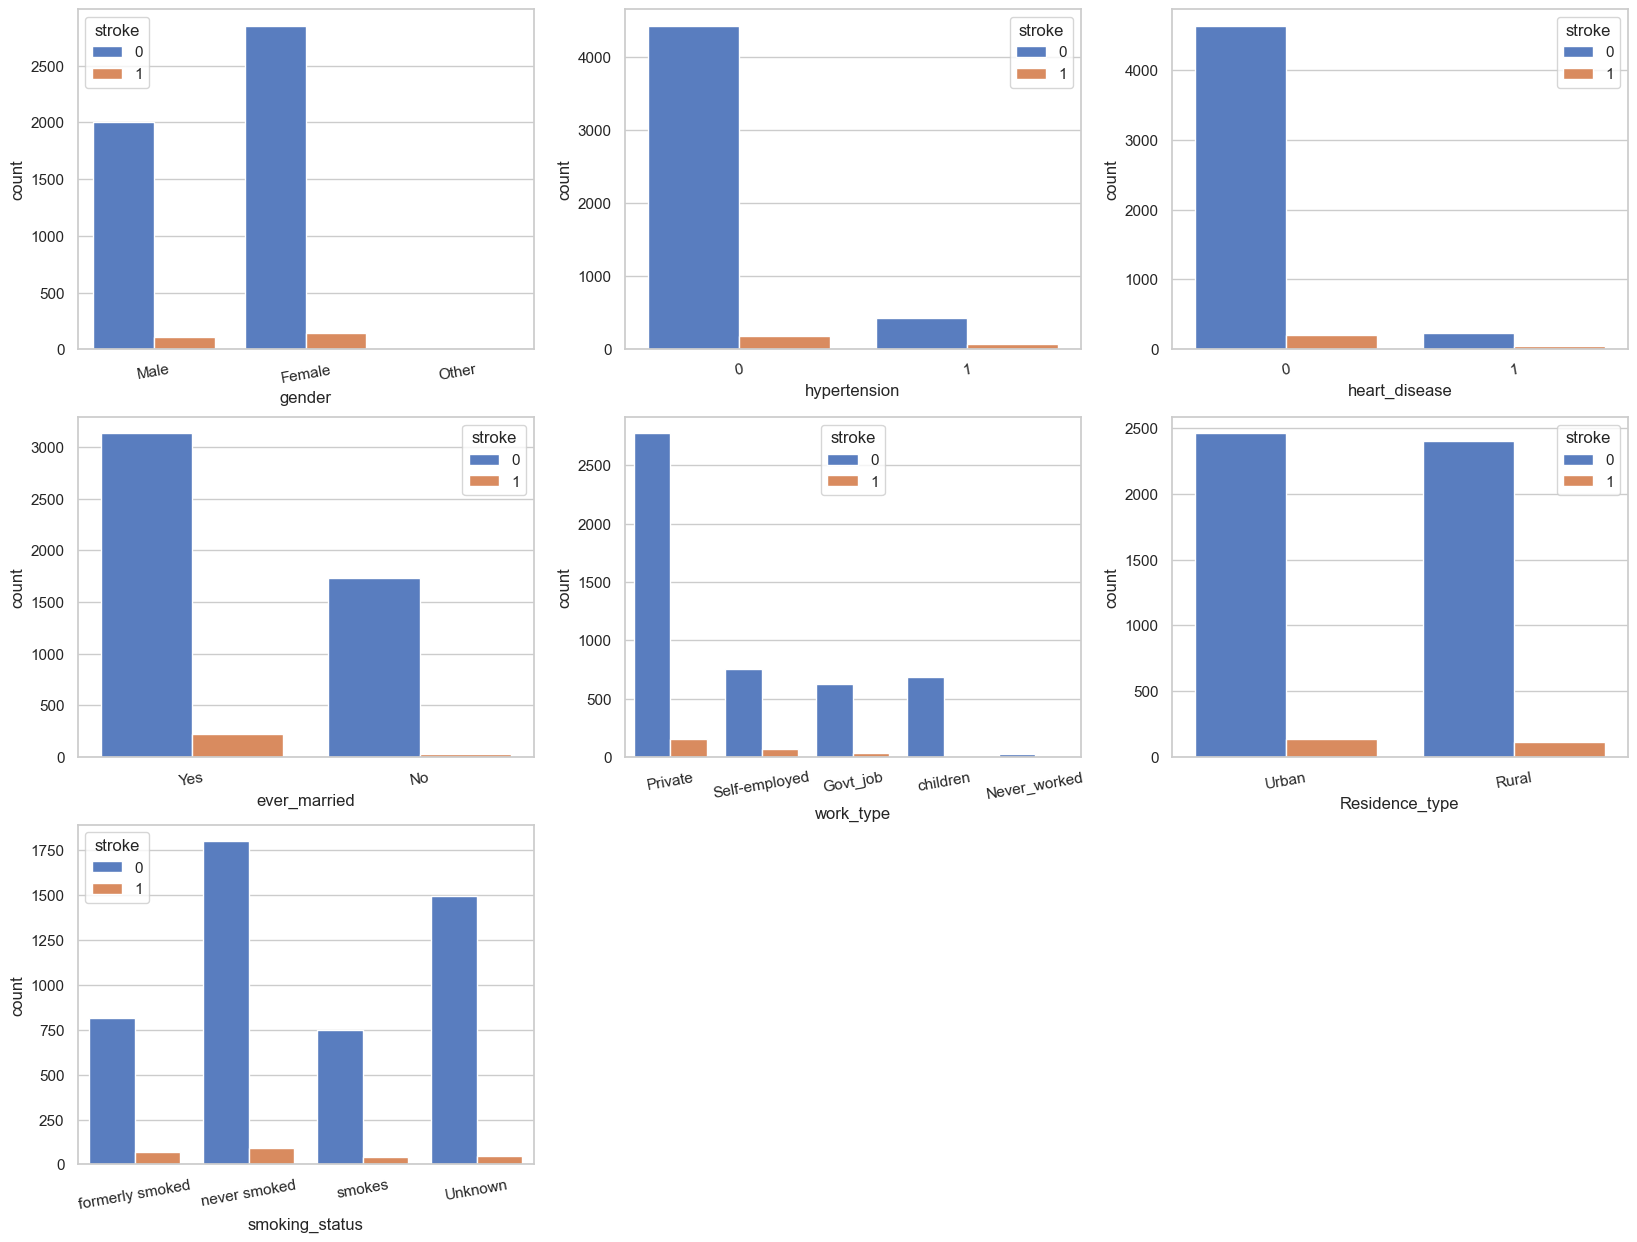

In [8]:
#Ploting stroke frequency for diffrent classes
stroke_class_list = ['gender','hypertension', 'heart_disease', 
                     'ever_married','work_type', 
                     'Residence_type','smoking_status'] 

plt.figure(figsize = (20, 15))
sns.set_theme(style="whitegrid", palette="muted")

for i in enumerate(stroke_class_list):
        plt.subplot(3, 3,i[0]+1)
        sns.countplot(data =stroke_df, x = i[1], hue = "stroke")
        plt.xticks(rotation = 10)

<Figure size 2000x1500 with 0 Axes>

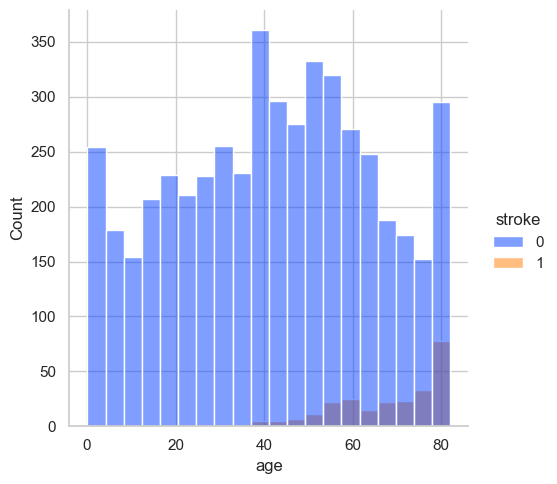

In [9]:
#Distribution plot age vs stroke
sns.set_theme(style="whitegrid", palette="bright")
plt.figure(figsize = (20, 15))
dis_plt = sns.displot(data = stroke_df, x = "age", hue = "stroke" )

<font size = 4>
Obesravtions:<br> 
 - Most patience did nor have a stroke<br>
 - Patience over the age of 40 are more porne to having a stroke<br>
 - Patience aroung the age of 80 have had the most amount of strokes

Text(0.5, 1.0, 'Stroke vs Age, Violin Plot')

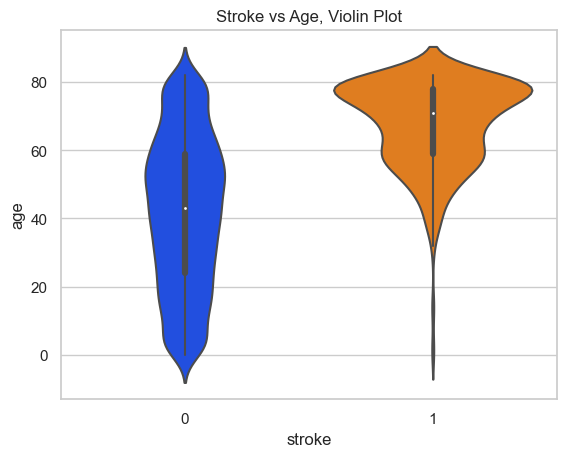

In [10]:
# Violin plot to understand the patients likelihood of getting a stroke
stroke_violin = sns.violinplot(data = stroke_df, x = "stroke", y = "age")
stroke_violin.set_title("Stroke vs Age, Violin Plot")

<font size = 4>
Obesravtions:<br> 
 - The highest number of strokes is for patience close to the age of 80 years 

Text(0.5, 1.0, 'Count Stroke vs No Sroke')

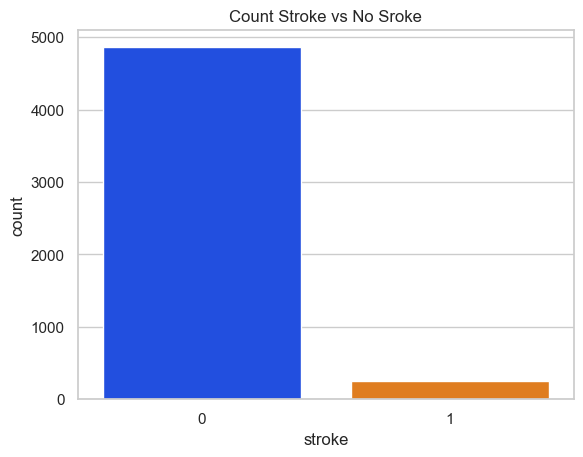

In [11]:
#count plot to check if dataset is balanced
countplot = sns.countplot(data = stroke_df, x = "stroke") 
countplot.set_title("Count Stroke vs No Sroke")

- <font size = 4>  As we can see from the plot, there is a significant number of target values, of people that did not have a stroke compared to the target values of people with a stroke, this tells us that the dataset is imbalanced.

Text(0.5, 1.0, 'Stroke Data Correlation')

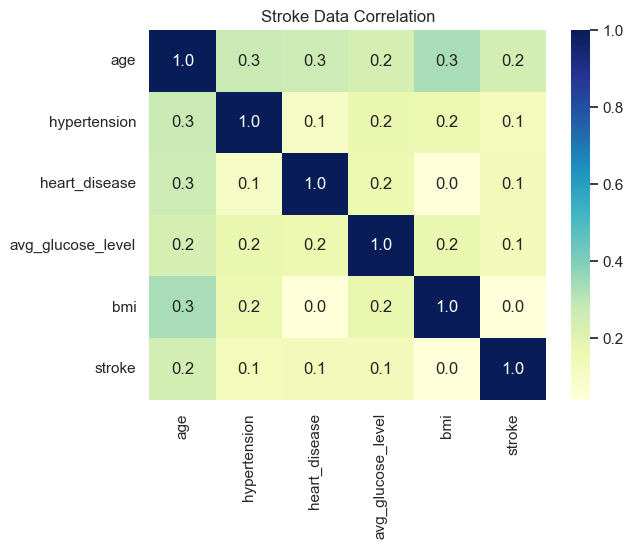

In [12]:
#Generating a heat map to uderstand the correlation among variables
labels = ["gender","age", "hypertension" , "heart_disease", "ever_married" , "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status","stroke"]
sns.heatmap(data = stroke_df[labels].corr(), annot=True,fmt=".1f", vmax = 1, cmap="YlGnBu" ).set_title("Stroke Data Correlation")

<font size = 4>
Obesravtions:<br> 
 - Hypertension, heart disease, bmi, age, average glucose levels have are strongly coreleated.

### Removing Outliers

In [13]:
#Function for ploting a box plot given a DF and features
def plot_boxplot(df, ft):
    df.boxplot(column = ft)
    plt.grid(False)
    plt.show()

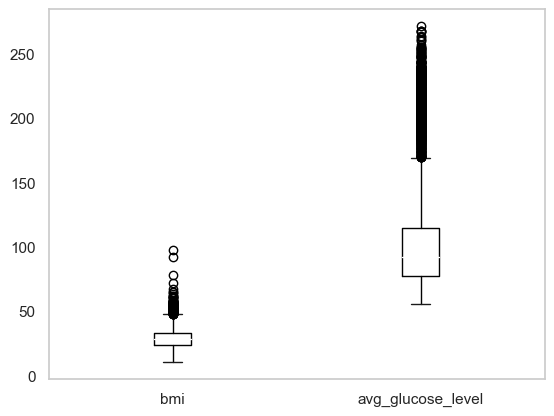

In [14]:
#Ploting box plot of bmi and avg_glucose_level to check for outliers
features = ["bmi","avg_glucose_level"]
plot_boxplot(stroke_df, features)

In [15]:
#Function to check for outliers, and return a list of idecies
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    lowerBound = Q1 -1.5*IQR
    upperBound = Q3 +1.5*IQR
    index_list = df.index[(df[ft] < lowerBound) | (df[ft] > upperBound)]
    return index_list

In [16]:
#Storing indecies of outliers
index_list = []
for ft in ["bmi","avg_glucose_level"]:
    index_list.extend(outliers(stroke_df, ft))

In [17]:
#Function to remove outliers given index of outlier
def removeOutliers(df, index_list): 
    #Sorting indeces and making them unique
    index_list = sorted(set(index_list))
    df = df.drop(index_list)
    return df

In [18]:
#Removing outliers for bmi and avg_glucose_level, and creating a new df
stroke_df_cleaned = removeOutliers(stroke_df, index_list)
stroke_df_cleaned.shape

(4401, 12)

### Handelling Null Values

In [19]:
#Checking for null values in the Data set
stroke_df_cleaned.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  140
smoking_status         0
stroke                 0
dtype: int64

In [20]:
#Handeling null values for BMI feature, Using Mean imputation
bmi_mean = stroke_df_cleaned['bmi'].mean()
stroke_df_cleaned['bmi'] = stroke_df_cleaned['bmi'].fillna(bmi_mean)

In [21]:
#Checking for null values in the Data set
stroke_df_cleaned.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Encoding Objects 

In [22]:
#Checking Data Types before encoding
stroke_df_cleaned.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [23]:
#Encoding all object data, in the data frame
obj_columns = ["gender ","ever_married ","work_type","Residence_type ","smoking_status"]
encoded_stroke_df = pd.get_dummies(stroke_df_cleaned,obj_columns,drop_first=True)
encoded_stroke_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender _Male,gender _Other,ever_married _Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type _Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
6,53882,74.0,1,1,70.09,27.400000,1,1,0,1,0,1,0,0,0,0,1,0
7,10434,69.0,0,0,94.39,22.800000,1,0,0,0,0,1,0,0,1,0,1,0
8,27419,59.0,0,0,76.15,27.811992,1,0,0,1,0,1,0,0,0,0,0,0
9,60491,78.0,0,0,58.57,24.200000,1,0,0,1,0,1,0,0,1,0,0,0


In [24]:
#Checking Data Types after encoding
encoded_stroke_df.dtypes

id                                  int64
age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender _Male                        uint8
gender _Other                       uint8
ever_married _Yes                   uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
Residence_type _Urban               uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object

In [25]:
#Saving new datset
directory_path = "../data/"
encoded_stroke_df.to_csv(directory_path + "preprocessed-healthcare-dataset-stroke-data.csv", index = "False")